## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusion)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean() 

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

*We need to query the rows that have the `treatment` group with the `old_page` as a landing_page.*<br>
*Or the `control` group with the `new_page` as a landing_page.*

In [6]:
df.query('((group == "treatment") & (landing_page == "old_page")) | ((group == "control") & (landing_page == "new_page"))').shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

*We should only use the rows that we can feel confident in the accuracy of the data.*<br>
*So, we need to query the rows that have the `treatment` group with the `new_page` as a landing_page.*<br>
*Or the `control` group with the `old_page` as a landing_page.*

In [8]:
# creating new cleaned dataframe 
df2 = df.query('((group == "treatment") & (landing_page == "new_page")) | ((group == "control") & (landing_page == "old_page"))')

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(['user_id'])][['user_id']]

,user_id
2893,773192


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# drop user_id duplication
df2 = df2.drop_duplicates(['user_id'])

# check duplicatetion 
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

*Since we have 0s and 1s in `converted`, We can use `.mean()` directly.*

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
p_conv = df2.converted.mean()
p_conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
p_control = df2.query('group == "control"')['converted'].mean()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
p_treatment = df2.query('group == "treatment"')['converted'].mean()
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
p_new = df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]
p_new

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Based on the above results:** <br> 
It looks like that the control group has a slightly higher conversion rate (12.04%) than the treatment group (11.88%). <br>
However, these results don't provide solid evidence if one page leads to more conversions as we still don't know the significance of these results and the factors that might have contributed to the results above, such as change resistance or test time duration. <br>
Also, the probability of an individual receiving the new page is almost 50%, which means that the difference in the conversion rate is between the same amount of traffic for each group. <br>
So, in order to provide meaningful information to support the decision whether to implement the new page or keep the old page, we need to define our test hypothesis and calculate p-value for the new and old pages.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Hypotheses:**
- The null hypothesis $H_0$ will be that there is no difference in the proportion of conversions rate between the new page and old page or the new page will lead to a decrease in the proportion of conversions rate.
- The alternative hypothesis $H_1$ will be that the new page will lead to an increase in proporsion of conversions rate.

$$H_0 : P{new} \leq P{old}$$
$$H_1 : P{new} > P{old}$$

- Our alternative hypothesis is what we want to prove to be true, in this case, that the new page will lead to an increase in proporsion of conversions rate than the old page. 
- And the null hypothesis is what we assume to be true before we collect and analyzing the data, which is that the new page has a conversion rate is less than or equal to the old page.

So, we can rearrange our hypotheses to look like this:

$$H_0 :  P_{new} - P_{old} \leq 0$$

$$H_1 : P_{new} - P_{old} > 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
# the converted rate regardless of the page
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
# the converted rate regardless of the page
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# sample choice between [0, 1]
# sample size = number of users (n_new)
# p = probability [p_new, 1-p_new]
new_page_converted = np.random.choice([0, 1], size=n_new, p=[p_new, 1-p_new])
new_page_converted

array([1, 0, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# sample choice between [0,1]
# sample size = number of users (n_old)
# p = probability [p_old, 1-p_old]
old_page_converted = np.random.choice([0, 1], size=n_old, p=[p_old, 1-p_old])
old_page_converted

array([1, 1, 1, ..., 0, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted.mean()/n_new - old_page_converted.mean()/n_old

-2.0861440359351159e-08

*Barely there is a difference.*

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
# Create sampling distribution for difference
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, replace=True, p=[p_new, 1-p_new])
    old_page_converted = np.random.choice([0, 1], size=n_old, replace=True, p=[p_old, 1-p_old])
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

In [26]:
# convert to numpy array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [27]:
# let's first Compute observed difference in conversion rates
obs_diff = p_treatment - p_control

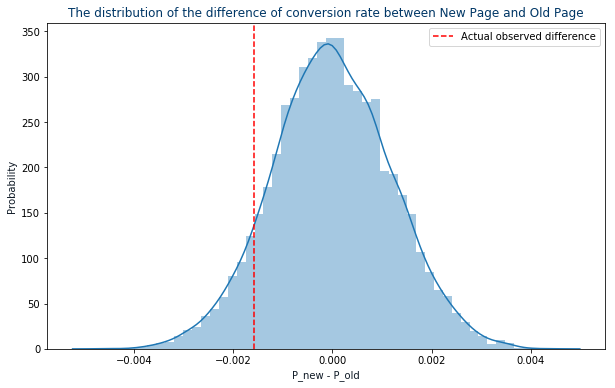

In [28]:
# plot distribution
plt.figure(figsize=(10, 6))
sns.distplot(p_diffs)

plt.xlabel('P_new - P_old', color='#0f1a26', size=10)
plt.ylabel('Probability', color='#0f1a26', size=10)
plt.title('The distribution of the difference of conversion rate between New Page and Old Page', color='#013766', size=12)

# plot line for our observed statistic
plt.axvline(x=obs_diff, color='r', linestyle='--', label='Actual observed difference');

plt.legend()
plt.show()

**In this plot, the distribution is normally distributed as expected, here we plotted the differences in means between the conversions rates for old page and new page, by generating random samples using sampling distribution.**

*Resources: [Fitting a Normal distribution to 1D data
](https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data)*

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# the p-value which is the probability of the observing statistic if the null hypothesis is true 
(p_diffs > obs_diff).mean()

0.90680000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**<u>Observations:</u>**


**In part j**, We've computed the P-value, The P-Value is the probability of observing our chosen statistic (or one more extreme in favor of the alternative) if the Null hypothesis is true. The smaller the P-Value, the stronger the evidence against the null hypothesis and in favor of the alternative hypothesis.<br>

So, if the P-value is high, the old page's performance is better than the new page or the same, and if it is very low (less than  $\alpha$ value - the type I error threshold), the new page's performance is better than the old one.

Therefore, after finding that the P-value equals **0.90** which is high enough and more than the $\alpha$ value (0.05), so we **fail to reject the null hypothesis** and make a decision that the old page's performance is better than or the same as the new page's performance.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2.query('(group == "control") & (converted == 1)').shape[0]
convert_new = df2.query('(group == "treatment") & (converted == 1)').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
# first parameter is the number of successes 
# second parameter is the number of trials
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(f"z_score: {z_score}\np_value: {p_value}")

z_score: 1.3109241984234394
p_value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [32]:
# import required libraries
from scipy.stats import norm

# Shows the significance of the z_score
print(norm.cdf(z_score))

0.905058312759


In [33]:
# at 95% confidence level, what is the critical value
print(norm.ppf(1-0.05))

1.64485362695


We wanted to calculate the percentage of the z-score using cdf function which is the cumulative distribution function, and then the critical value at 5% (95% confidence level) type I error rate using ppf function which is the percent point function.

**<u>Observations:</u>**
- The z_score is less than the critical value (1.6448). Therefore, we fail to reject the null hypothesis. Which is consistent with the results in parts j & k.
- The calculated values match with those obtained from the bootstrapped hypothesis testing.

*Resources:* <br>
http://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html <br>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We should use Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
# import required libraries
import statsmodels.api as sm

In [35]:
# create intercept column and dummies variables
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
# logistic regression model
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-15 20:15 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [38]:
# exp of coefficients
np.exp(result.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [39]:
# 1/exp of coefficients
1/np.exp(result.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

**<u>Interpretation:</u>**
- If the individual receives the new page, it is 1.015 times more likely to make conversion less than if he receives the old page. 

**That is a very small difference in the performance between both pages, with a little bit of performance for the old page.**

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**P-value:**
- The P-Value as a result of the logistic regression is 0.1899.
- This value is above the $\alpha$ value (0.05), but it is difference since we have performed a two tailed test.
- So, we fail to reject the null in this situation.

**It is different from the P-value we got in part II; because here we have different hypotheses.**

$$H_0 : P_{new} = P_{old}$$
$$H_1 : P_{new} \neq P_{old}$$


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Considering other factors is a good idea as these factors may contribute to the significance of our test results and leads to more accurate decisions. One of the disadvantages of adding additional terms into the regression model is Simpson's paradox where the combined impact of different variables disappears or reverses when these variables are combined but appears where these variables are tested individually.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
# loading the data
df3 = pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
# get unique values
df3.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [42]:
# join data
df_new = df2.join(df3.set_index('user_id'),on ='user_id')

In [43]:
# create dummies variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [44]:
# logistic regression model
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
result = log_mod.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-15 20:16 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

In [45]:
# exp of coefficients
np.exp(result.params)

intercept    0.135779
CA           0.960018
UK           1.009966
dtype: float64

In [46]:
# 1/exp of coefficients
1/np.exp(result.params)

intercept    7.364925
CA           1.041647
UK           0.990133
dtype: float64

**<u>Interpretation:</u>**
- The P-Values for each country are above $\alpha$ value (0.05). Therefore, we fail to reject the null. There is no significant impact from the country on the conversion rates for the two pages.
- If an individual is from the US, it is 0.9901 times more likely to make a conversion than if he is from the UK, holding all other variables constant.
- If an individual is from the US, it is 1.04 more likely to make a conversion than if he is from CA, holding all other variables constant.

**From the above values, it is very close to 1, we can say that there is no influence on the conversion rate comes from the country variable.**

In [47]:
# import required libraries
from patsy import dmatrices

In [48]:
# create dummy variables, and their interactions
y, X = dmatrices('converted ~ C(country)*C(landing_page)', df_new, return_type="dataframe")

# flatten y into a 1-D array
y = np.ravel(y)

# create a logistic model with X as independent variables, and y as dependent one
log_mod2 = sm.Logit(y, X)
result2 = log_mod2.fit()
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                       Results: Logit
=============================================================================================
Model:                       Logit                     No. Iterations:            6.0000     
Dependent Variable:          y                         Pseudo R-squared:          0.000      
Date:                        2020-11-15 20:16          AIC:                       212782.6602
No. Observations:            290584                    BIC:                       212846.1381
Df Model:                    5                         Log-Likelihood:            -1.0639e+05
Df Residuals:                290578                    LL-Null:                   -1.0639e+05
Converged:                   1.0000                    Scale:                     1.0000     
---------------------------------------------------------------------------------------------
                                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------------------
Intercept                                    -2.0715   0.0371 -55.7977 0.0000 -2.1442 -1.9987
C(country)[T.UK]                              0.0901   0.0405   2.2252 0.0261  0.0107  0.1694
C(country)[T.US]                              0.0644   0.0384   1.6788 0.0932 -0.0108  0.1396
C(landing_page)[T.old_page]                   0.0674   0.0520   1.2967 0.1947 -0.0345  0.1694
C(country)[T.UK]:C(landing_page)[T.old_page] -0.0783   0.0568  -1.3783 0.1681 -0.1896  0.0330
C(country)[T.US]:C(landing_page)[T.old_page] -0.0469   0.0538  -0.8718 0.3833 -0.1523  0.0585
=============================================================================================

"""

In [49]:
# exp of coefficients
np.exp(result2.params)

Intercept                                       0.126002
C(country)[T.UK]                                1.094247
C(country)[T.US]                                1.066532
C(landing_page)[T.old_page]                     1.069775
C(country)[T.UK]:C(landing_page)[T.old_page]    0.924703
C(country)[T.US]:C(landing_page)[T.old_page]    0.954198
dtype: float64

In [50]:
# 1/exp of coefficients
1/np.exp(result2.params)

Intercept                                       7.936353
C(country)[T.UK]                                0.913871
C(country)[T.US]                                0.937618
C(landing_page)[T.old_page]                     0.934776
C(country)[T.UK]:C(landing_page)[T.old_page]    1.081428
C(country)[T.US]:C(landing_page)[T.old_page]    1.048001
dtype: float64

**<u>Interpretation:</u>**
- If an individual is from CA and uses the new page, he is 0.913871 times more likely to make a conversion than if he is from the UK and using the new page, holding all other variables constant.

- If an individual is from CA and uses the new page, he is 0.937618 times more likely to make a conversion than if he is from the US and use the new page, holding all other variables constant.

- If an individual is from CA and uses a new page, he is 0.934776 times more likely to make a conversion than if he is from CA and uses the old page, holding all other variables constant.

- There is no influence in the conversion rate if an individual uses the old page or the new page, or if he is in a specific country or another.

- There is no difference in the conversion rate if an individual uses one of the pages and he is in a specific country.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
# Adding interaction variables between page and country
df_new['CA_page'] = df_new['CA'] * df_new['ab_page']
df_new['UK_page'] = df_new['UK'] * df_new['ab_page']

df_new.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,CA_page,UK_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1,0,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0,1,0


In [53]:
# logistic regression model
log_mod3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK', 'CA_page', 'UK_page']])
result3 = log_mod3.fit()
result3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-15 20:16 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA_page      -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
UK_page       0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

In [54]:
# exp of coefficients
np.exp(result3.params)

intercept    0.137178
ab_page      0.979646
CA           0.982625
UK           0.994272
CA_page      0.954198
UK_page      1.031896
dtype: float64

In [55]:
# 1/exp of coefficients
1/np.exp(result3.params)

intercept    7.289813
ab_page      1.020776
CA           1.017682
UK           1.005761
CA_page      1.048001
UK_page      0.969090
dtype: float64

**<u>Interpretation:</u>**

- After utilizing some interaction variables in the logistic regression model, there continues to be no variable with significant p-values (above  $\alpha$  value). <br>
- There is no much influence in the conversion rate if an individual uses the old page or the new page, or if he is in a specific country or another.
- There is no difference in the conversion rate if an individual uses one of the pages and he is in a specific country.

So, we fail to reject the null hypothesis. There is insufficient evidence to suggest that there is an interaction between country and page that will predict whether a user converts.

<a id='conclusion'></a>
### Conclusion:

After our data analysis, and based on the information available to us, we used three methods to know which page has the highest performance in conversion rate, using the probability, hypothesis testing, and regression models.


All of these methods give us evidence that the performance of the old page is better than the new one with a tiny difference, so we do not have sufficient evidence to suggest that the new page will result in more conversions than the old page we can make a decision that **keeps the old page and reject the new page**.

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0